# Exploratory Data Analysis
---
In this notebook, we aim to visualise the differences in trends between life expectancy and health-adjusted life expectancy (HALE), as well as visualise the correlations between the metrics and both life expectancy and HALE.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from matplotlib.pyplot import figure

sb.set() # set the default Seaborn style for graphics

#Libraires to read multiple csv files
import os
import glob

import pickle # to save dataframe

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# read finalized_df.csv
finalized_df = pd.read_pickle('finalized_df.pkl')
finalized_df_with_LE = finalized_df.copy()
finalized_df.drop("Life expectancy at birth, total (years)", axis = 1 , inplace = True)

# load dfs_dict
dfs_dict = np.load('dfs_dict.npy',allow_pickle='TRUE').item()

### Comparing Trends over Time for Average Life Expectantancy and Average Health-Adjusted Life Expectancy (HALE)

We calculate the average life expectancy and health-adjusted life expectancy (HALE) over all countries, then plot a line graph of both life expectancy and HALE from 2000-2019.

In [3]:
# calculate the global averages of the dfs and store into a df dictionary
ave_dfs_dict = {}
for key, df in dfs_dict.items():
    ave_df = df.mean(axis=0)
    ave_dfs_dict[key] = ave_df

C:\Users\shery\AppData\Local\Temp/ipykernel_23508/4242321164.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ave_df = df.mean(axis=0)


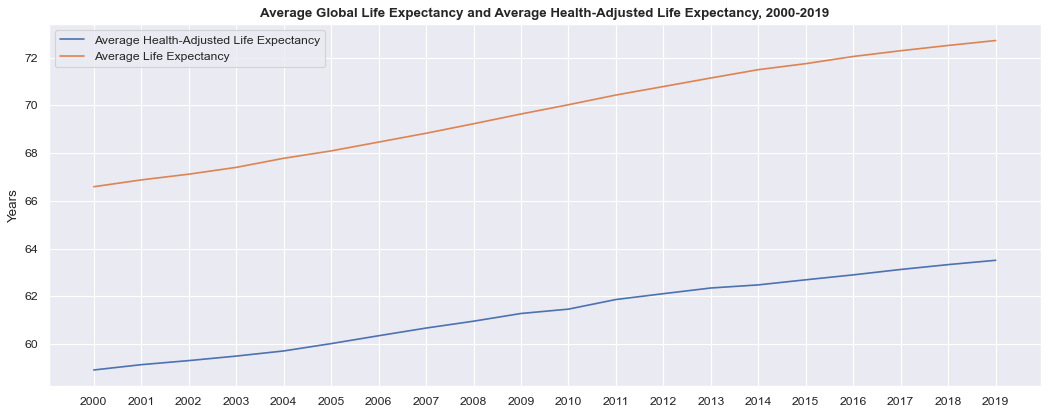

In [4]:
ave_HALE = ave_dfs_dict['HALE']
ave_LE = ave_dfs_dict['Life expectancy at birth, total (years)']
year = [x for x in range(2000,2020)]

figure(figsize=(16, 6), dpi=80)
plt.plot(year, ave_HALE, label = "Average Health-Adjusted Life Expectancy")
plt.plot(year, ave_LE, label = "Average Life Expectancy")
plt.xticks(year)
plt.ylabel("Years")
plt.title("Average Global Life Expectancy and Average Health-Adjusted Life Expectancy, 2000-2019", fontweight="bold")
plt.legend()
plt.show()

As can be seen from the line graph, both average life expectancy and average health-adjusted life expectancy (HALE) have been increasing from 2000-2019, although they plateau slightly. However, average HALE is consistently below average life expectancy, and also increases at a slower rate.

---

### Comparing Distributions of Average Life Expectantancy and Average Health-Adjusted Life Expectancy (HALE)

We plot two histograms showing the distributions of life expectancy and health-adjusted life expectancy (HALE) for the years 2000 and 2019.

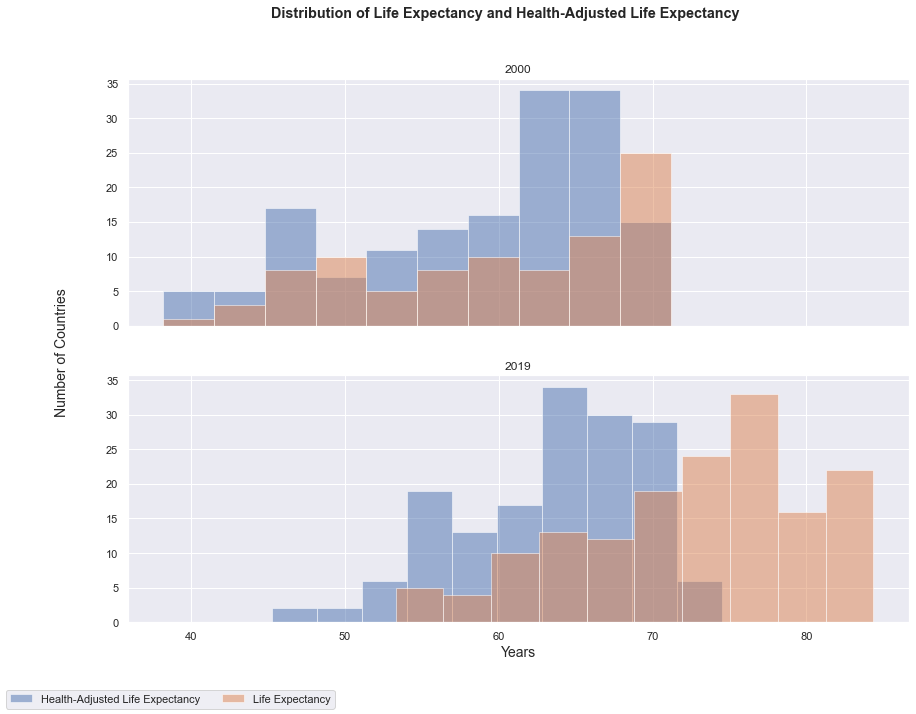

In [5]:
fig, axs = plt.subplots(2, sharey=True,figsize=(14,10), sharex=True)

hale_2000 = dfs_dict['HALE']['2000']
le_2000 = dfs_dict['Life expectancy at birth, total (years)']['2000']
hale_2019 = dfs_dict['HALE']['2019']
le_2019 = dfs_dict['Life expectancy at birth, total (years)']['2019']

_, bins, _ = axs[0].hist(hale_2000, alpha=0.5, label='Health-Adjusted Life Expectancy')
axs[0].hist(le_2000, bins, alpha=0.5, label='Life Expectancy')
axs[0].title.set_text('2000')

axs[1].hist(hale_2019, alpha=0.5, label='Health-Adjusted Life Expectancy')
axs[1].hist(le_2019, alpha=0.5, label='Life Expectancy')
axs[1].title.set_text('2019')

fig.text(0.06, 0.5, 'Number of Countries', ha='center', va='center', rotation='vertical',fontsize=14)

fig.legend(['Health-Adjusted Life Expectancy','Life Expectancy'],ncol=2,loc="lower left")
plt.suptitle('Distribution of Life Expectancy and Health-Adjusted Life Expectancy', fontweight="bold")
plt.xlabel('Years', fontsize=14)
plt.show()

In 2000, the distribution of both life expectancy and HALE were quite skewed towards the right, however in 2019 both were more evenly distributed and also shifted to the right, indicating that life expectancy and HALE has both increased and become more equitable worldwide. However, it can also be seen that while life expectancy has increased substantially, HALE has only increased a small amount.

---

### Comparing Trends over Time for Independent Variables

We calculate the global averages for all the other datasets, then plot line graphs to visualise their trends from 2000-2019

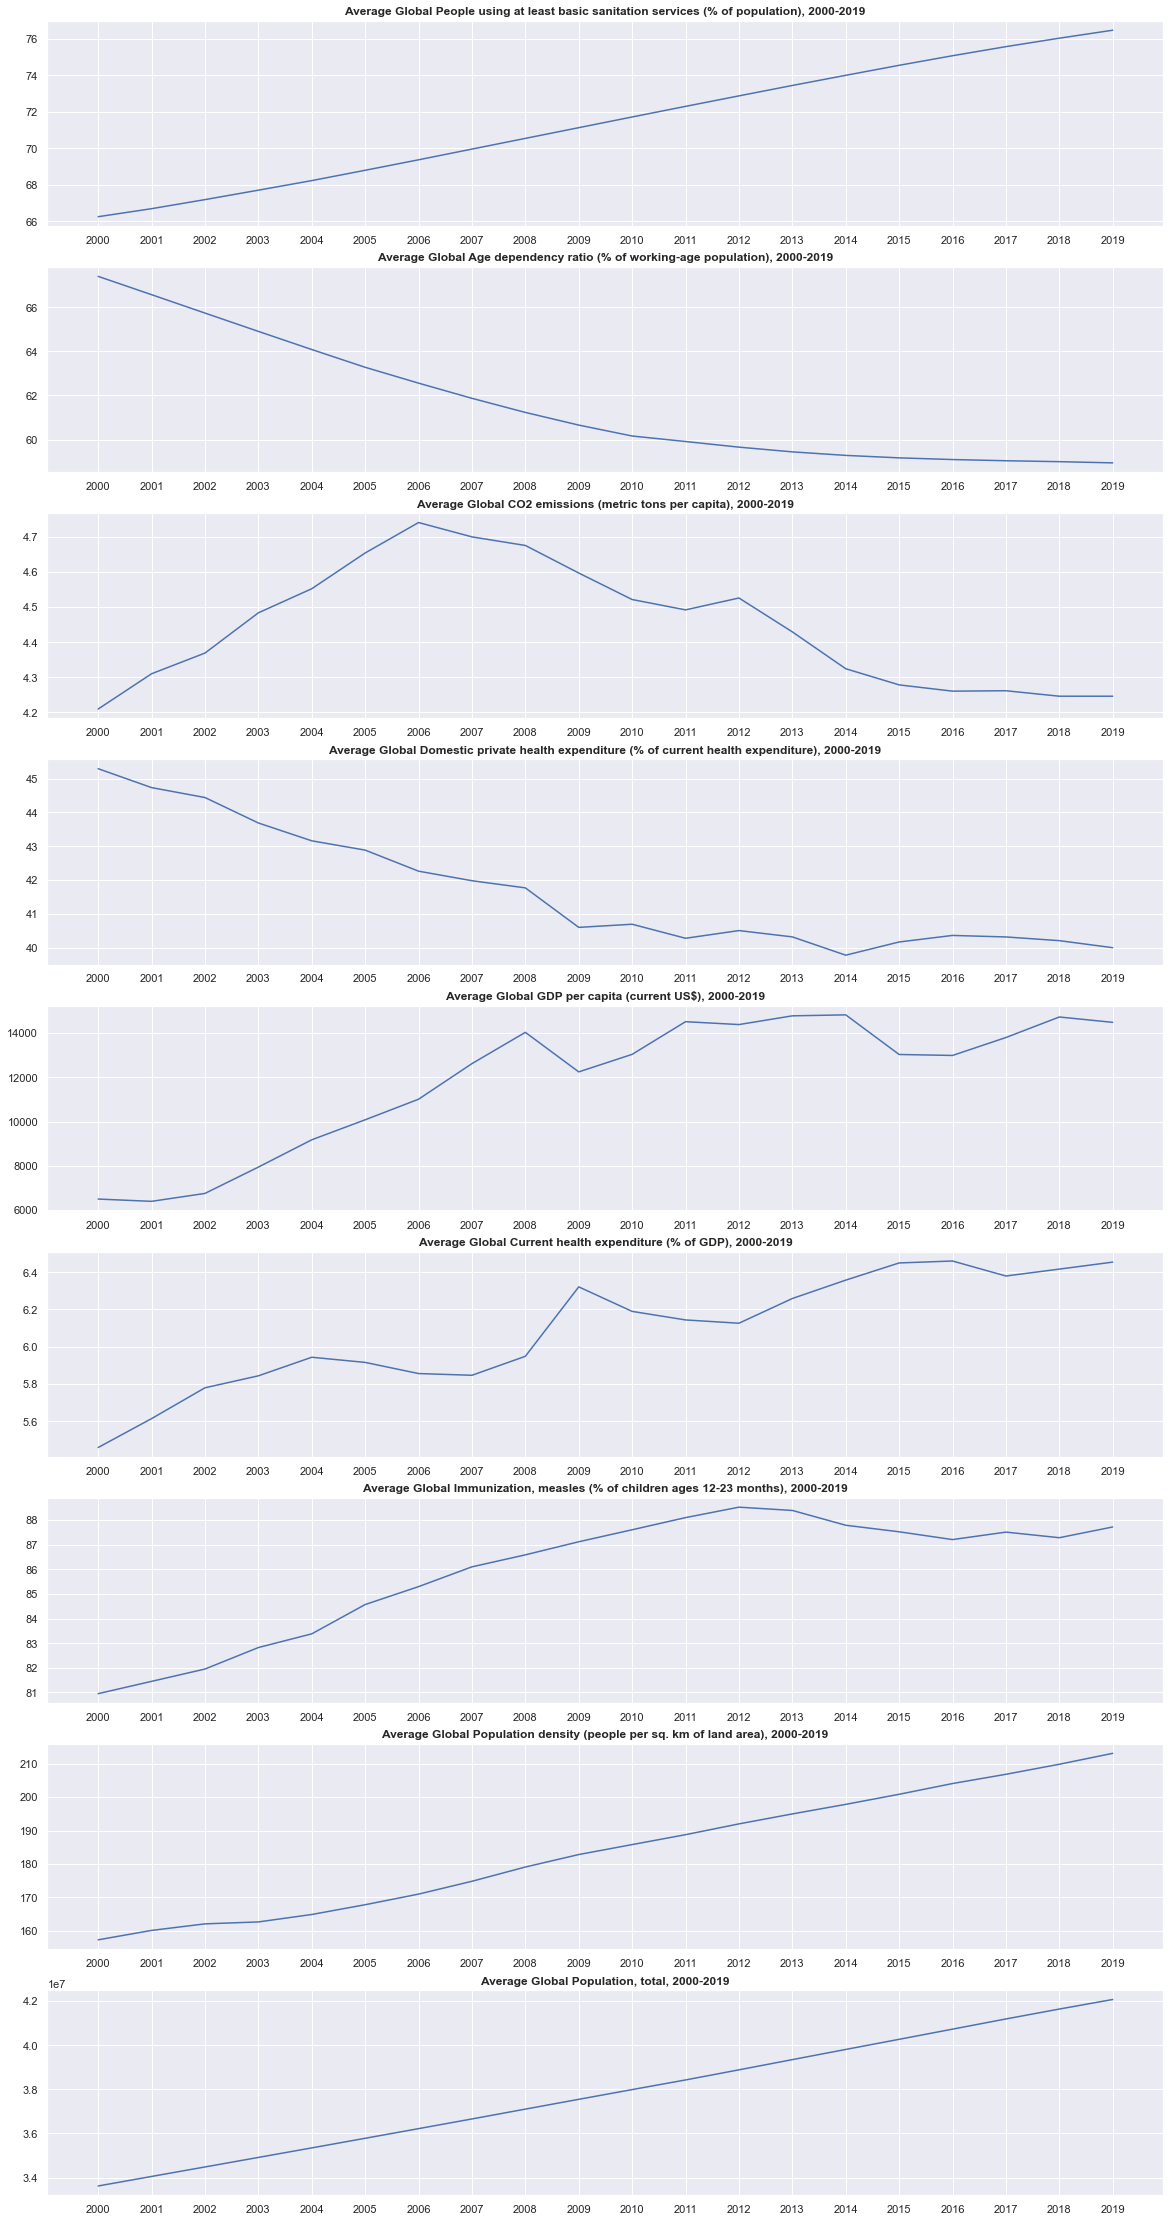

In [6]:
fig, axs = plt.subplots(len(ave_dfs_dict)-2, 1, figsize=(20,40))
i = 0
for key, df in ave_dfs_dict.items():
    if key == 'HALE' or key == 'Life expectancy at birth, total (years)':
        continue
    sb.lineplot(data=df, ax=axs[i]).set_title('Average Global ' + key + ', 2000-2019', fontweight="bold")
    i += 1
plt.show()

### Visualising Relationships between Variables

We plot a pairplot to visualise each parameter's distribution and their relationship with other parameters.

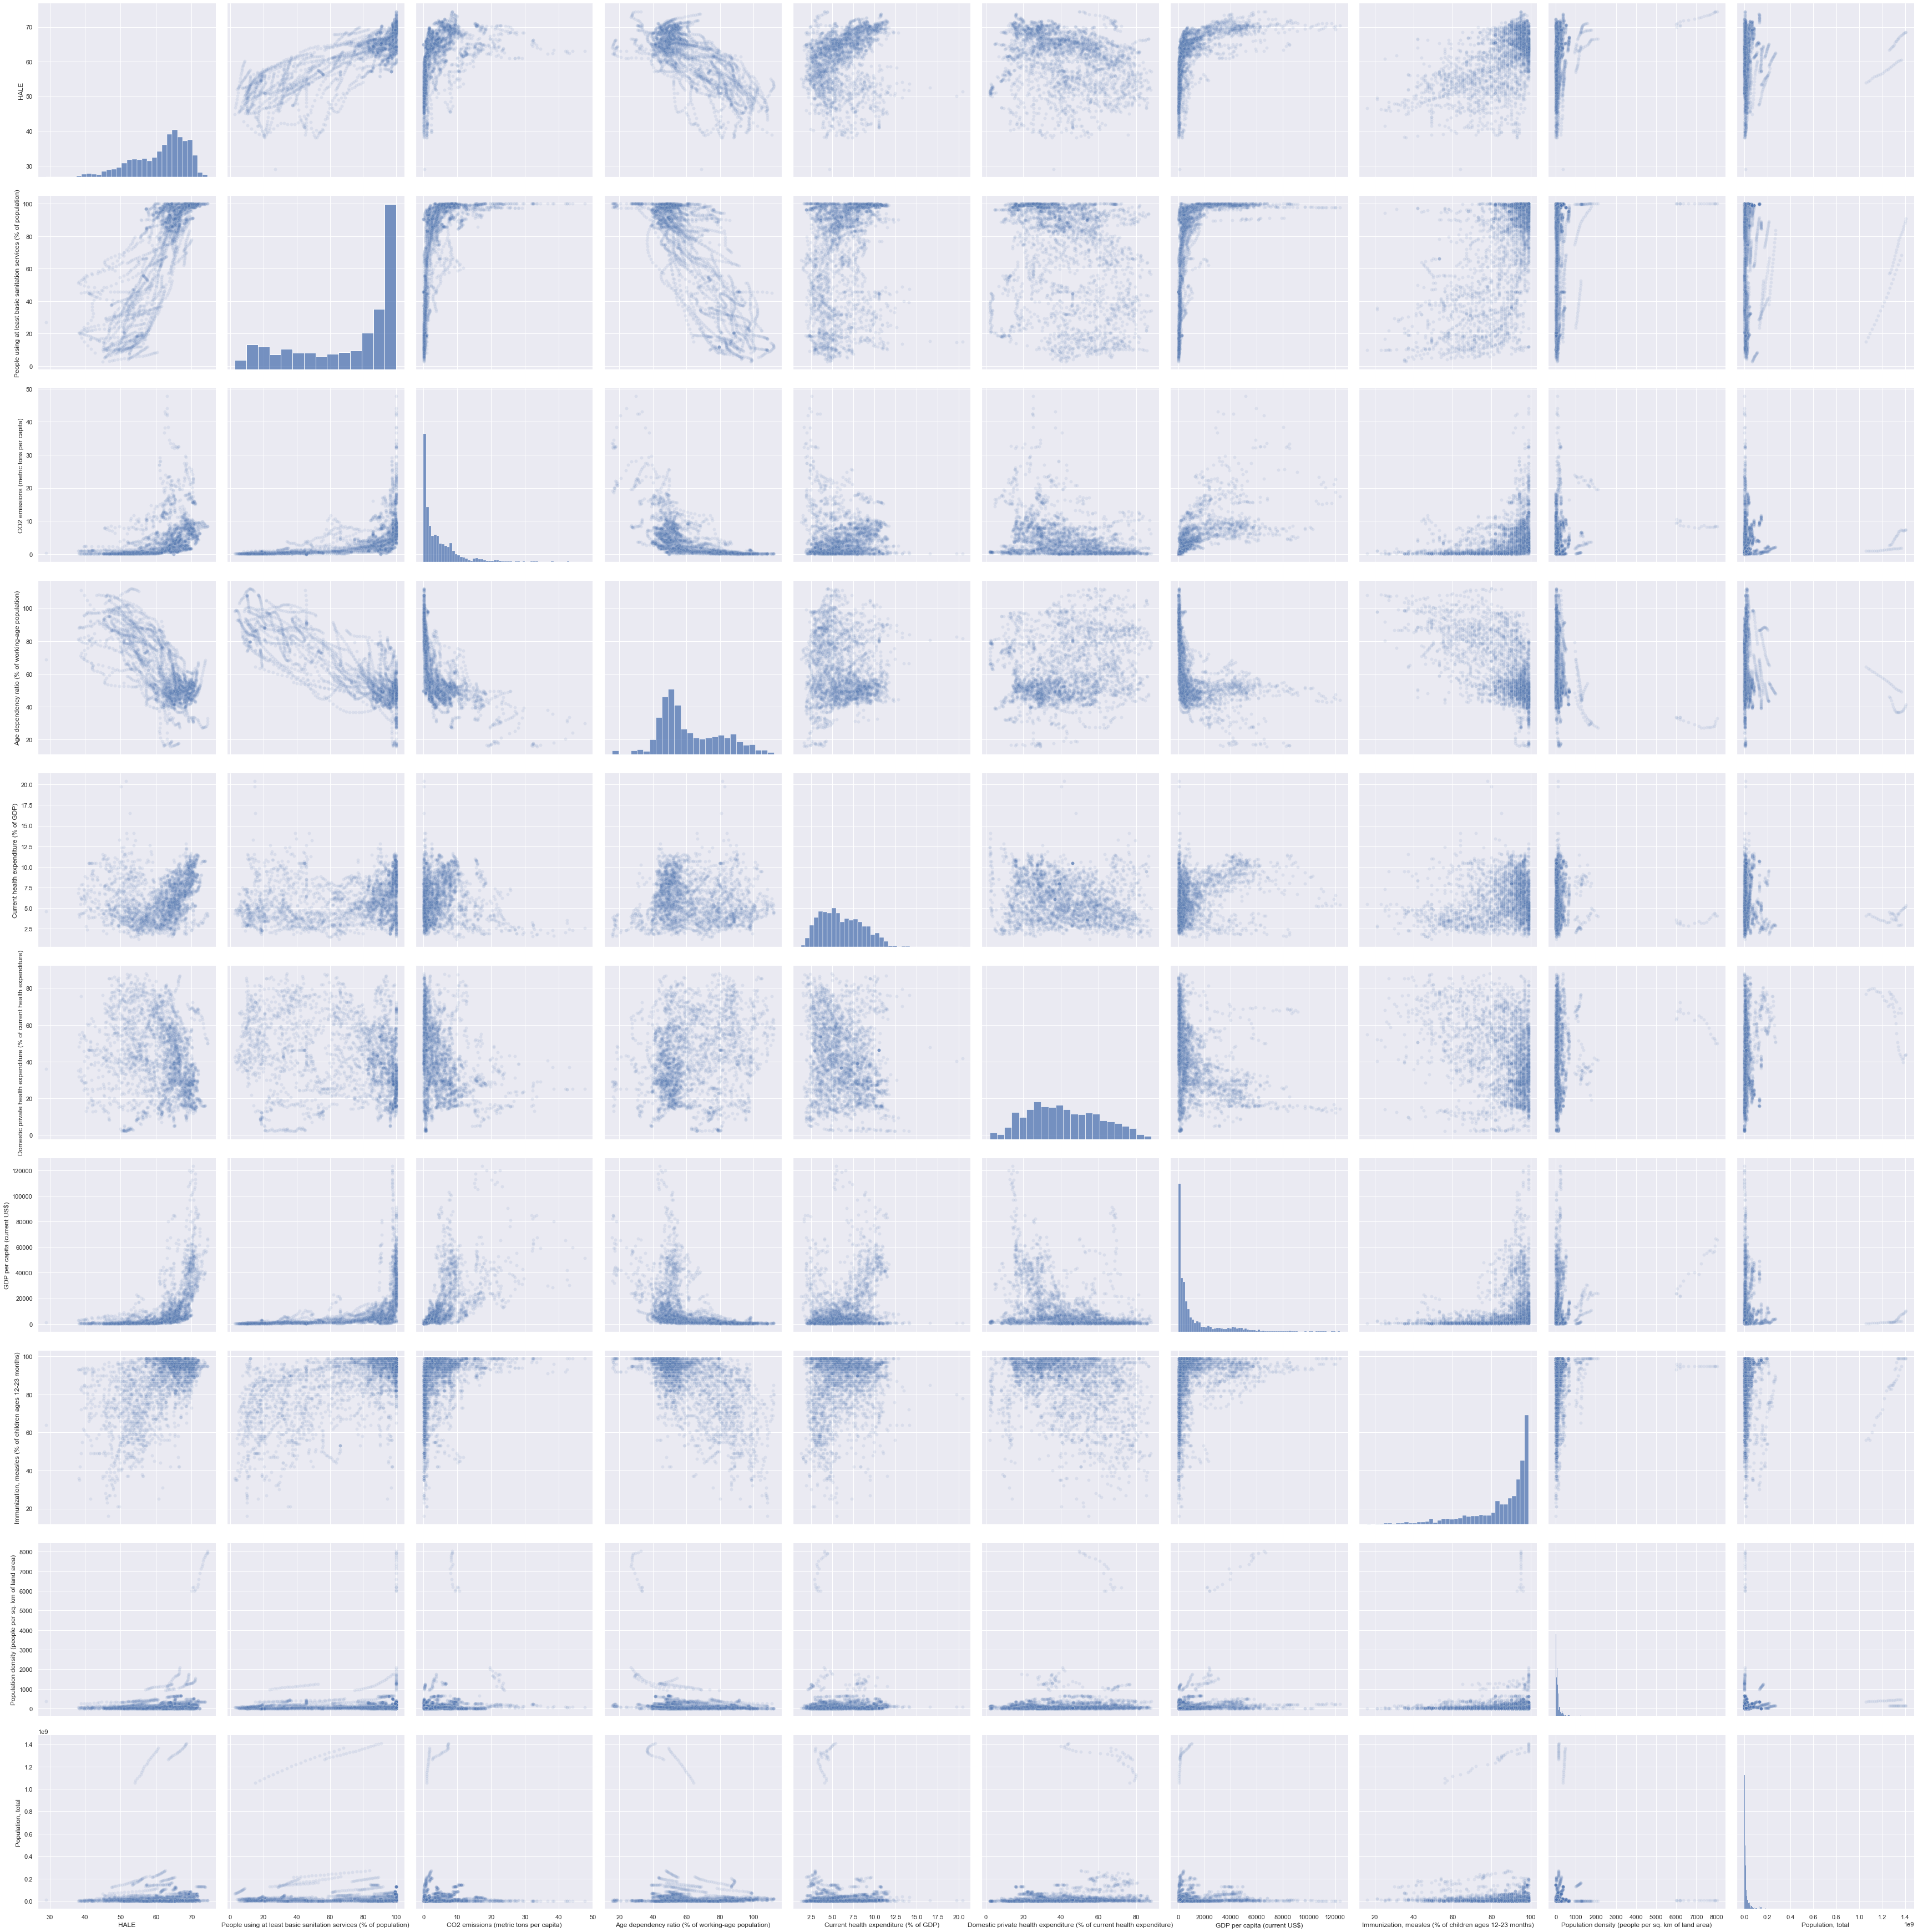

In [7]:
g=sb.pairplot(data=finalized_df, plot_kws=dict(alpha=0.1))
g.fig.set_size_inches(50,50)

### Visualising Relationship between HALE and other Variables
We are interested in the relationship between HALE and other variables. As there are a lot of datapoints, scatter plots get quite messy and complicated. In order to address this, we also plot the related hexbin plot below each scatter plot. The hexbin plot provide a clearer visualisation of the relationship between the data, with darker colours corresponding to greater density of datapoints.

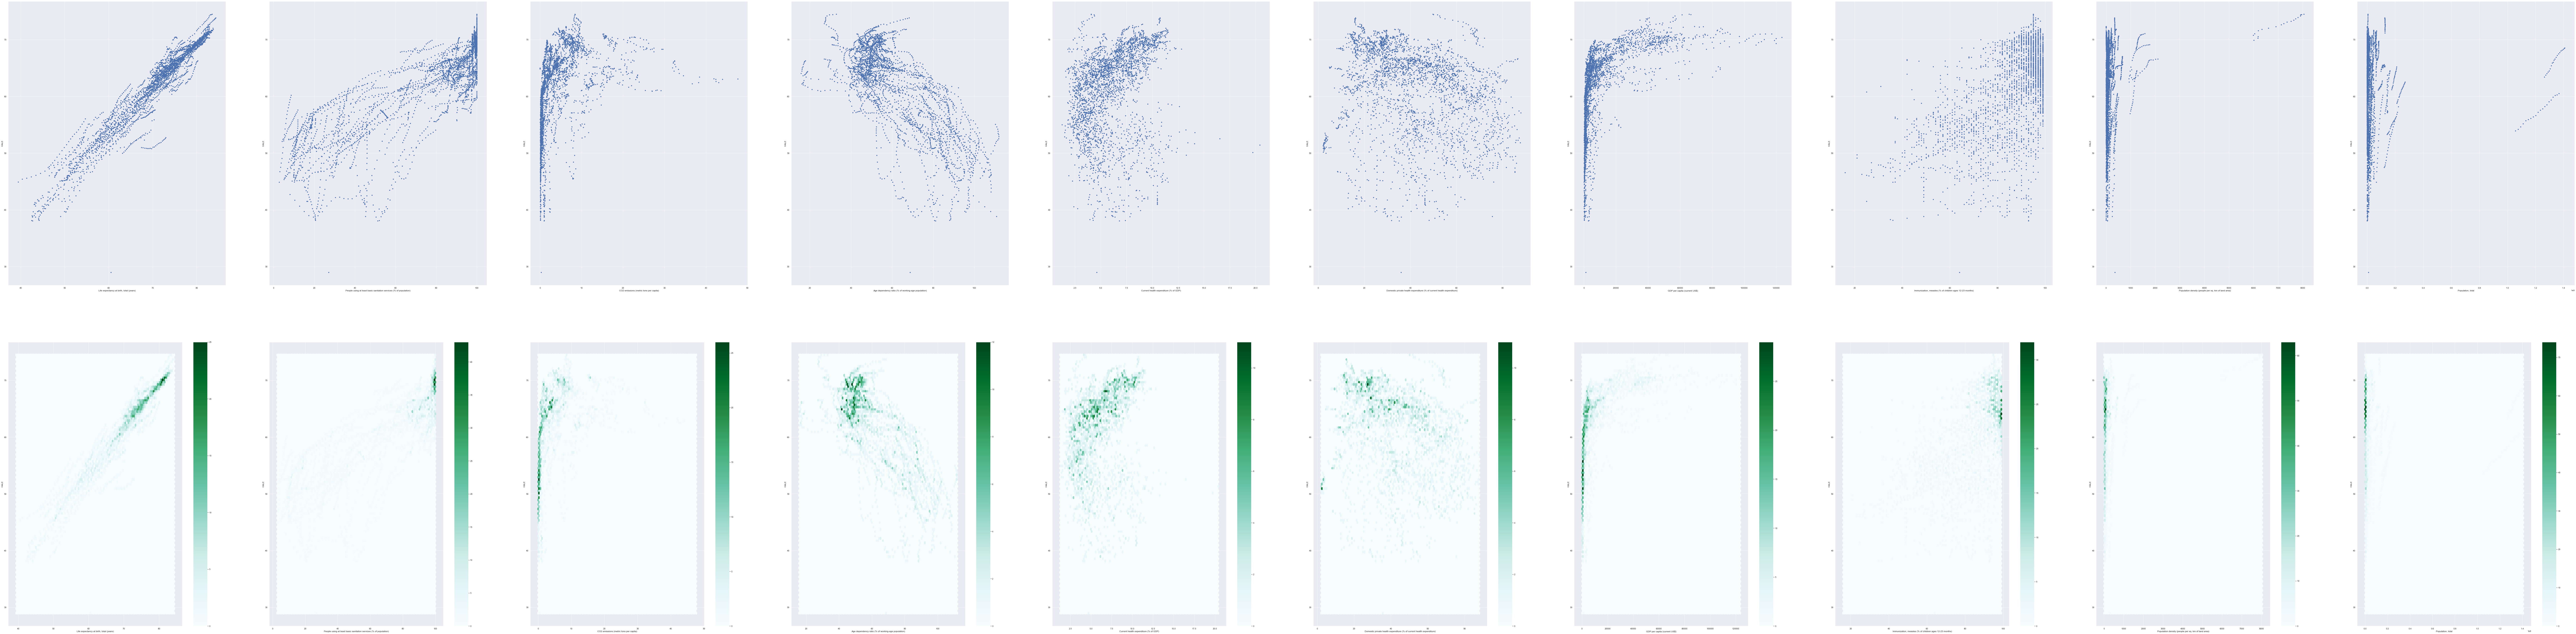

In [8]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

cols = [i for i in list(finalized_df_with_LE.columns) if i not in ['HALE', 'Country Name']]
f, axes = plt.subplots(2, 10, figsize=(240,60))
i=0
for col in cols:
    finalized_df_with_LE.plot(kind='scatter',x=col, y='HALE', ax=axes[0,i])
    finalized_df_with_LE.plot(kind='hexbin',x=col, y='HALE', ax=axes[1,i])
    i+=1
plt.show()

From both the hexbin plots and the scatter plots, it can be seen that the relationships between HALE and the other variables are mostly nonlinear. In some cases, there is also no clear correlation between the variable and HALE.

---

### Visualising Correlations

We plot calculate the correlations between each variable with each other and visualise them with a heatmap. A positive correlation is represented using red colors, while a negative correlation is represented using blue colors. The magnitude of correlation is represented using intensity of the color.

HALE  \
HALE                                                1.000000   
Life expectancy at birth, total (years)             0.961466   
People using at least basic sanitation services...  0.826878   
CO2 emissions (metric tons per capita)              0.436286   
Age dependency ratio (% of working-age population) -0.735309   
Current health expenditure (% of GDP)               0.262562   
Domestic private health expenditure (% of curre... -0.253426   
GDP per capita (current US$)                        0.553664   
Immunization, measles (% of children ages 12-23...  0.582852   
Population density (people per sq. km of land a...  0.183895   
Population, total                                   0.016994   

                                                    Life expectancy at birth, total (years)  \
HALE                                                                               0.961466   
Life expectancy at birth, total (years)                                            1.000000   
People using at least basic sanitation services...                                 0.840493   
CO2 emissions (metric tons per capita)                                             0.475663   
Age dependency ratio (% of working-age population)                                -0.765466   
Current health expenditure (% of GDP)                                              0.288556   
Domestic private health expenditure (% of curre...                                -0.333695   
GDP per capita (current US$)                                                       0.583631   
Immunization, measles (% of children ages 12-23...                                 0.616560   
Population density (people per sq. km of land a...                                 0.164963   
Population, total                                                                  0.010993   

                                                    People using at least basic sanitation services (% of population)  \
HALE                                                                                         0.826878                   
Life expectancy at birth, total (years)                                                      0.840493                   
People using at least basic sanitation services...                                           1.000000                   
CO2 emissions (metric tons per capita)                                                       0.553251                   
Age dependency ratio (% of working-age population)                                          -0.821062                   
Current health expenditure (% of GDP)                                                        0.238362                   
Domestic private health expenditure (% of curre...                                          -0.287967                   
GDP per capita (current US$)                                                                 0.502214                   
Immunization, measles (% of children ages 12-23...                                           0.631013                   
Population density (people per sq. km of land a...                                           0.119009                   
Population, total                                                                           -0.053255                   

                                                    CO2 emissions (metric tons per capita)  \
HALE                                                                              0.436286   
Life expectancy at birth, total (years)                                           0.475663   
People using at least basic sanitation services...                                0.553251   
CO2 emissions (metric tons per capita)                                            1.000000   
Age dependency ratio (% of working-age population)                               -0.605890   
Current health expenditure (% of GDP)                                            -0.002513   
Domestic private health expenditure

<AxesSubplot:>

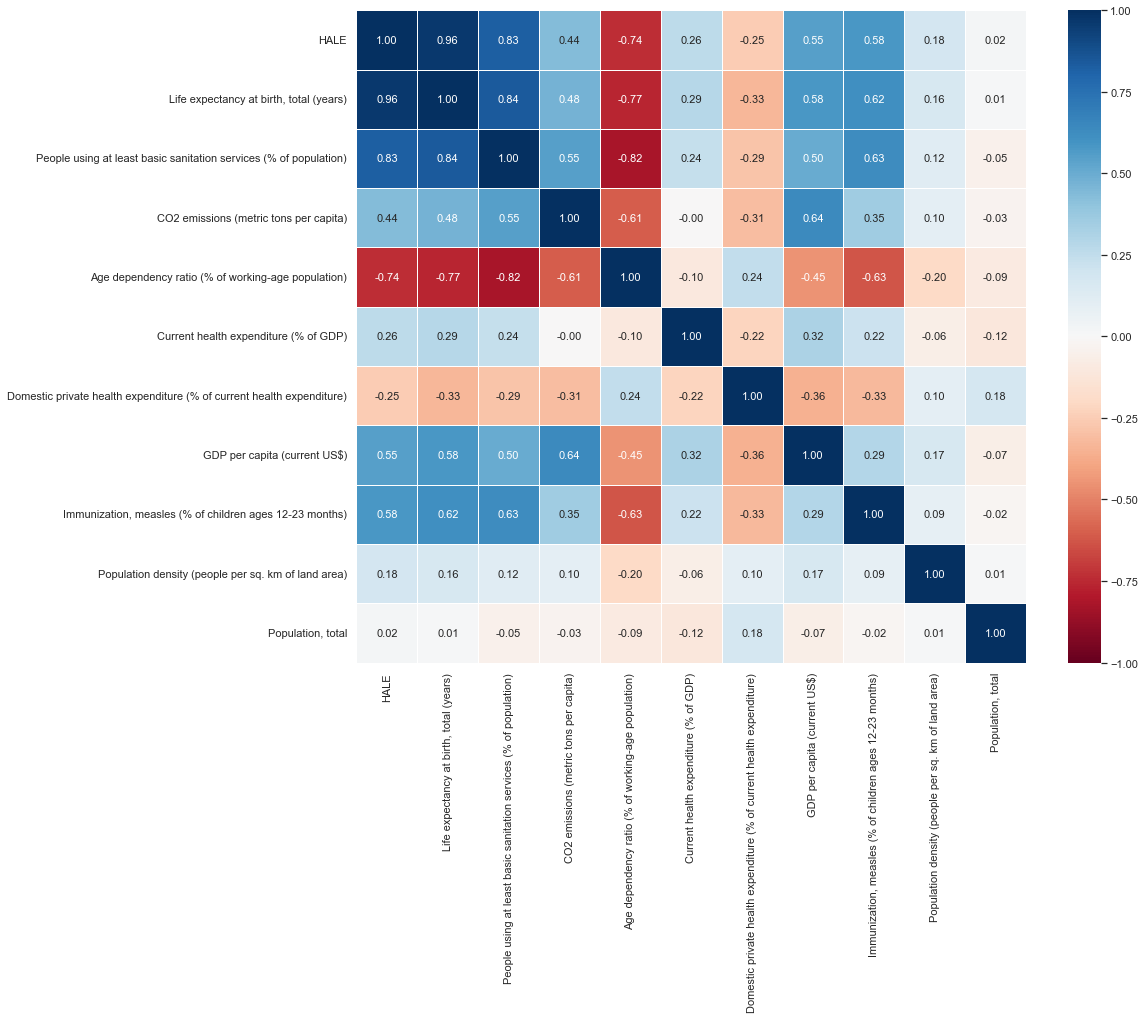

In [9]:
## Visualising Correlations
from IPython.display import display
display(finalized_df_with_LE.corr())
fig, axs = plt.subplots(figsize=(15, 12))
sb.heatmap(finalized_df_with_LE.corr(), vmin=-1, vmax=1, linewidths=1, annot=True, fmt='.2f', annot_kws={'size':11}, cmap='RdBu')

From the heatmap, it can be seen that HALE has a relatively strong connection with varibles including People using at least basic sanitation services ( % of population) and Age dependency ratio (% of working-age population). Addtionally, it also has a considerable correlation with variables such as GDP per capita (current US$), Immunization, measles (% of children ages 12-23 months) and Immunizatio and DPT (% of children ages 12-23 months).

HALE and life expectancy have a high correlation with each other. It is also interestin to note that they share similar but not identical correlations with the other metrics.